# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [2]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(4.7115)


## Sampling from categorical probabilities with given probabilities

In [3]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

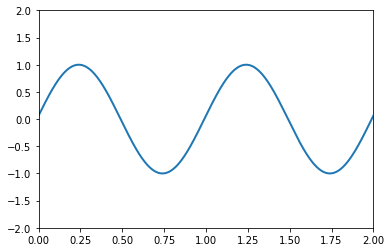

In [4]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

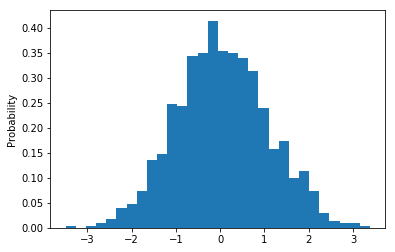

In [5]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

    Generate random variable from prefered dystribution using Pyro (pyro.sample)
        animate how distribution of values changes
        animate histograms of values
        start with empty list of values, generate new samples, generate histogram


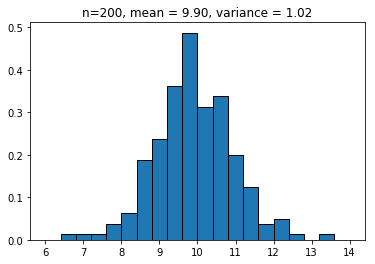

In [6]:
import seaborn as sns
from scipy.stats import norm

mean = 10
variance = 1
bins = 20
frames = 200

def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=20)
    plt.ylabel('Probability');
    data = []
    
    # animation function. This is called sequentially
    def update(i):
        x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
        data.append(x)
        mu, std = norm.fit(data)
        
        plt.cla()
        plt.title("n=%.0f, mean = %.2f, variance = %.2f" % (len(data), mu, std))
        plt.hist(data, bins=bins, density=True, range=[-variance*4+mean,variance*4+mean], edgecolor='black')
        
        

    # initialization
    def init():
        line.set_data([], [])
        return (line,)
    
    anim = animation.FuncAnimation(fig, update, init_func=init,
                                   frames = frames, interval=200, blit=False)
    return HTML(anim.to_jshtml())

animate()

## Task 2



Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.
        it must be a simulator!
        sample from distribution using given probabilities
        repeate experiment and compare with Bayes equation
        
ill    99%    1%

not    2%    98%
       pos   neg
       
D- ill
N- not ill
+- positive
-- negative

P(D)=1/50 000 to 1/500
P(N)=1-P(D)
P(+|D)=0.99
P(-|N)=0.98
P(+|N)=1-P(-|N)=0.01

P(D|+) = P(D)P(+|D)/P(+)= P(D)P(+|D)/{P(+|D)P(D)+P(+|N)P(N)}
                          P(D)*0.99 /{0.99* P(D)+ 0.01*(1-P(D)}


Text(0.5,0,'Ill peoples per 50000 people')

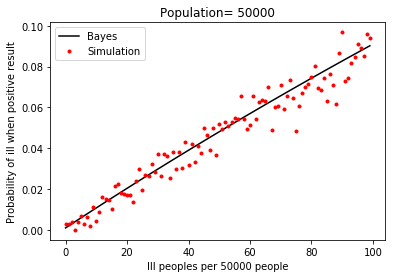

In [8]:
import random

population = 50000
positive_ill=0.99
positive_n_ill=0.02

bayes_data = []
sim_data = []
ill_data = []

def rand(prob):
    return random.random()<prob

def bayes(ill):
    x=ill*positive_ill/(positive_ill*ill+positive_n_ill*(1-ill))
    return x

def simulation(ill):
    pos_ill_iter = 0
    pos_iter = 0
    
    for i in range(population):
        ill_buff=rand(ill)
        positive_buff=rand(positive_ill*ill+positive_n_ill*(1-ill))
        
        if ill_buff:
            if rand(positive_ill):
                pos_ill_iter+=1
                pos_iter+=1
        else:
            if rand(positive_n_ill):
                pos_iter+=1
                
    if pos_iter==0:
        return 0
    return pos_ill_iter/pos_iter
    


for i in range(100):
    ill = (i+1)/50000
    ill_data.append(i)
    sim_data.append(simulation(ill))
    bayes_data.append(bayes(ill))
    
fig, ax = plt.subplots()
bayes_plot = ax.plot(ill_data, bayes_data, '-k', label='Bayes')
simulation_plot = ax.plot(ill_data, sim_data, '.r', label='Simulation')
plt.title('Population= %.0f' % population)   
plt.legend();
plt.ylabel('Probability of ill when positive result')
plt.xlabel('Ill peoples per 50000 people')
